# INF 8215 - Intelligence artif.: méthodes et algorithmes 
## Automne 2018 - TP3 - Machine Learning

**Date de rendu: 6 Décembre**

**Fichiers à rendre:**
    * TP3_FR.ipynb complété
    * SoftmaxClassifier.py complété
    * test_prediction.csv le fichier de résultat

## Introduction

Le but de ce TP est de vous donner un aperçu du déroulement général d'un projet de machine learning tout en vous familiarisant avec des librairies python adaptées.


Dans la première partie, vous implémenterez un algorithme de classification multiclasse appelé **softmax regression** à l'aide uniquement de la bibliothèque **numpy** et l'intégrerez à la bibliothèque **scikit-learn**.

Dans la deuxième partie, vous prendrez connaissance du **dataset** utilisé pour ce projet. Et vous serez amenés à effectuer le **preprocessing** de ces données pour qu'elles soient utilisables dans les algorithmes de machine learning classiques. Vous utiliserez les bibliothèques **pandas** et **scikit-learn**.

Enfin, dans la troisième partie, vous comparerez l'efficacité du modèle que vous avez implémenté avec d'autres modèles déjà implémentés dans **sklearn**. Puis vous tenterez d'améliorer les performances de l'algorithme sélectionné.

Pour enfin soumettre vos résultats sur la plateforme **kaggle**.

## Installation

Pour installer **pandas** et **scikit-learn** le plus simple est de télécharger et d'installer **Anaconda** qui regroupe les packages les plus utilisés pour le calcul scientifique et la science des données.

Vous trouverez la distribution ici : https://www.anaconda.com/download/#linux .

Assurez-vous d'avoir la version **20.0** de **scikit-learn**.

## Bonus 1: Compétition (2 points)

Quand vous aurez terminé le TP, vous pourrez soumettre vos prédictions sur **kaggle**, vous obtiendrez votre performance en terme de **log loss**.
Vous pouvez ensuite me communiquer ce résultat par mail (laurent.boucaud@polymtl.ca) et me joindre votre fichier de prédiction sur l'ensemble de test(pour vérification).

Une conversation dans le forum sera créée pour tenir à jour le meilleur score obtenu par une des équipes du cours.

Tant qu'aucun forum n'est créé, **ne m'envoyez pas vos performances si elles sont supérieures à 0.8 de log loss**.

Une fois le premier meilleur score affiché dans le forum, **ne me communiquez vos résultats que si votre log loss est inférieure au précédent meilleur score**.

Le nombre de points obtenus sera proportionnel au classement des équipes.

# 1. Softmax Regression (10 points)

Dans cette partie vous implémenterez **softmax regression** la variante de **logistic regression** qui permet d'effectuer de la classification pour un nombre de classe supérieur à 2.

Le code à compléter se trouve dans le fichier **SoftmaxClassifier.py**. 

**Pour cet exercice, la contrainte est d'utiliser uniquement la bibliothèque numpy**

## Encapsulation avec sklearn

La classe **SoftmaxClassifier** hérite des classes **BaseEstimator** et **ClassifierMixin** de **scikit-learn** ce qui nous permettra d'utiliser facilement avec notre classifier les outils fournis par scikit-learn dans la suite du TP.

Pour la compatibilité, le classifier implémente obligatoirement les méthodes:

* **fit**: responsable de l'entraînement du modèle
* **predict_proba**: permet de prédire la probabilité de chaque classe pour chaque exemple du dataset fourni.
* **predict**: permet de prédire la classe pour chaque exemple du dataset fourni.
* **score**: permet de quantifier l'écart entre les classes prédites et les classes réelles pour le dataset fourni


## Train/Test set:

Quand on veut tester les performances de l'apprentissage d'un algorithme de machine learning, on **ne le teste pas sur les données utilisées pour l'apprentissage**.

En effet, ce qui nous intéresse c'est que notre algorithme soit **capable de généraliser** ses prédictions à des données qu'il n'a **jamais vu**.

Pour illustrer, si on teste un algorithme sur les données d'entrainement, on teste sa capacité à **apprendre par coeur** le dataset et non à **généraliser**.

Par conséquent, quand on reçoit un nouveau dataset, la première chose à faire et de le **diviser en deux parties**: un ensemble d'**entraînement** (**70-80%** du dataset) et un ensemble de **test**(**20-30%** du dataset).

Tous les algorithmes de **traitement des données** et d'apprentissage devront être appris uniquement sur l'ensemble d'entraînement et appliqués ensuite sur l'ensemble de test.

Cela garantit l'absence de connaissances préalables de l'ensemble de test lors de l'entrainement.

## Gradient descent

La descente de gradient est un algorithme qui permet trouver la solution optimale d'un certains nombre de problèmes. Le principe est le suivant: on définit une **fonction de coût J**  qui caractérise le problème.
Cette fonction dépend d'un ensemble de **paramètres $\theta$ **. La descente de gradient cherche à **minimiser** la fonction de coût en **modifiant itérativement** les paramètres.

### Gradient

Le gradient de la fonction de coûts pour un $\theta$ donné, correspond à la direction dans laquelle il faut modifier $\theta$ pour réduire la valeur de la fonction de coût. 

La fonction de coût est minimale quand le gradient est nul.

Concrètement, on initialize $\theta$ aléatoirement, et on effectue à chaque itération un pas pour réduire la fonction de coût jusqu'à convergence de l'algorithme à un minimum.

### Learning rate

Le taux d'apprentissage correspond à la taille du pas que l'on va effectuer dans la direction du gradient.
Plus il est grand, plus la convergence est rapide mais il y a un risque que l'algorithme diverge.

Plus il est petit, plus la convergence est lente.

### Batch gradient descent

Il existe plusieurs algorithmes de descente de gradient. Nous utiliserons Batch gradient descent.

Dans cet algorithme, avant de mettre à jour $\theta$, on calcule les gradients sur l'ensemble des exemples d'entraînement.

### Epoch

Il s'agit d'un pas de la descente de gradient, soit une unique mise à jour de gradient.

### Bias/Variance tradeoff

Lorsqu'on entraine un algorithme de machine learning on cherche un équilibre entre **biais** et **variance**.

Un modèle avec un **biais fort**, est un modèle qui est **trop simple** pour la structure donnée considérée (modèle linéaire pour données quadratiques), cela limite la capacité du modèle à généraliser. On appelle aussi le biais **underfitting**.

Un modèle avec une **variance élevée** signifie qu'il est sensible aux petites variations dans les données d'entrainement, cela correspond à l'**overfitting**, c'est-à-dire que le modèle est trop proche de la structure de l'ensemble d'entrainement ce qui **limite sa capacité à généraliser**.

Un modèle avec un **biais important** aura une **mauvaise performance** sur l'ensemble d'**entraînement**.
Un modèle avec une **variance importante** aura une performance bien **moins bonne** sur l'ensemble de **test** que sur l'ensemble d'**entrainement**.


### One-hot-encoding

En machine learning pour représenter un vecteur de données catégoriques, on utilise le one-hot encoding.

Pour un vecteur comportant 5 exemples et 3 catégories différentes, on le représente sous forme d'une matrice de taille 5 par 3. Cette matrice est entièrement remplie de 0 sauf à l'indice correspondant au numéro de la classe pour chaque exemple.


Par exemple
$ y = \left(\begin{array}{cc} 
1 \\
1 \\
2 \\
3 \\
2 \\
\end{array}\right) $

devient:

$ yohe =  \left(\begin{array}{cc} 
1. & 0. & 0.\\
1. & 0. & 0.\\
0. & 1. & 0.\\
0. & 0. & 1.\\
0. & 1. & 0.\\
\end{array}\right) $


#### Question 1 (1 point)
Implémentez  la fonction  **_one_hot**  dans SoftmaxClassifier.py

In [3]:
from SoftmaxClassifier import SoftmaxClassifier
import numpy as np

softmax = SoftmaxClassifier(use_zero_indexed_classes = False)
softmax._one_hot(np.array([1,1,2,3,1]))

TypeError: __init__() got an unexpected keyword argument 'use_zero_indexed_classes'

### Matrice de poids

Soit $ X_{m * n} $ la matrice d'exemple et $ \Theta _{n*K} $ la matrice de poids avec:

* **m** le nombre d'exemples
* **n** le nombre de features
* **k** le nombre de classes

Il est d'usage d'ajouter une colonne supplémentaire à X, cette colonne est remplie de 1. Pour prendre en compte ce changement, il faut rajouter une ligne à la matrice $\Theta$.

On obtient X_bias$_{m*(n+1)}$ et $ \Theta _{(n+1)*K} $


Intuitivement, à chaque classe K est associée une colonne de $\theta$.

On note $\theta_k$ le vecteur de dimension n+1 la colonne de poids associée à la prédiction de la classe k.

$\Theta$ = [$\theta_0$,$\theta_1$... $\theta_k$ ... $\theta_n$ ]

Ainsi $ z = x * \Theta $ donne un vecteur de dimension K qui correspond aux **logits** associés à x pour chacune des classes.

#### Question 2 (1 point)
Dans la fonction  **fit**  dans SoftmaxClassifier.py instanciez X_bias et initialisez $\Theta$ aléatoirement. (ligne 74)

In [ ]:
softmax = SoftmaxClassifier(use_zero_indexed_classes = True)
softmax.fit(np.zeros((5, 5)), y=np.array([0, 1, 2, 3, 4]))

### Softmax

On veut convertir le vecteur de logits **z** obtenu dans la partie précédente, en un **vecteur de probabilité**.

Pour cela on définit la **fonction softmax**:

$$ \hat{p_x}^k = softmax(z)_k = \frac{exp(z_k)}{\sum_{\substack{1<j<K}} exp(z_j)} $$

Intuitivement, pour un logit de z, $z_k$, on prend l'exponentielle de cette valeur et on la divise par la somme des exponentielles de chaque logit du vecteur **z**. On obtient  $\hat{p_x}^k$ la probabilité que l'exemple **x** appartienne à la classe **k**.

On réitère l'opération pour chaque logit du vecteur **z**. 

On obtient ainsi un vecteur de probabilités $\hat{p_x}$ pour un exemple **x**. 

La division permet de rendre la somme des termes du vecteur $\hat{p_x}$ égale à 1 ce qui est indispensable dans le cadre des probabilités.

#### Question 3 (1 point)
Implémentez  la fonction  **_softmax**  dans SoftmaxClassifier.py

In [ ]:
softmax._softmax(np.array([0.5, 0.7, 0.8, 0.2, 0.1]))

#### Question 4 (1 point)
En utilisant la fonction **_softmax** de la question 3, implémentez  les fonctions  **predict_proba** et **predict**  dans SoftmaxClassifier.py

In [ ]:
x = np.random.rand(5,5)
y = np.array([0, 1, 2, 3, 4])
predict_proba = softmax.predict_proba(x)
softmax.predict(x)

### Fonction de coût Log loss

Soit la fonction de coût log loss (ou cross entropy):

$$ J( \Theta) = \frac{-1}{m}\sum_{\substack{1<i<m}} \sum_{\substack{1<k<K}} y_k^i log( \hat{p_k}^i ) $$

avec:
* **K** le nombre de classes
* **m** le nombre d'exemples dans les données
* $ \hat{p_k}^i  $  la probabilité que l'exemple i soit de la classe k
* $y_k^i$ vaut 1 si la classe cible de l'exemple i est k, 0 sinon

**Détail d'implémentation:** La fonction n'est pas définie pour des valeurs de probabilité de 0. ou 1., il faut donc s'assurer que étant donné $\epsilon$, les probabilités sont comprises dans [$\epsilon$, 1. - $\epsilon$].
#### Question 5 (1 point)
Implémentez  la fonction  **_cost_function**  dans SoftmaxClassifier.py en prenant en compte le **détail d'implémentation** (variable self.eps) et utilisez-la pour calculer la variable **loss** dans la fonction **fit** (ligne 84)

In [ ]:
softmax._cost_function(predict_proba, y)

### Gradient de la fonction de coût

Le **gradient de J** par rapport à la classe k (par rapport à $\theta_k$) est :


$$ \Delta_{\theta_k}J( \Theta) = \frac{1}{m} \sum_{\substack{1<i<m}}( \hat{p_k}^i - y_k^i)x^i  $$

avec:
* **K** le nombre de classes
* **m** le nombre d'exemples dans les données
* $ \hat{p_k}^i  $  la probabilité que l'exemple i soit de la classe k
* $y_k^i$ vaut 1 si la classe cible de l'exemple i est k, 0 sinon

Sous **forme matricielle**, on peut écrire le **gradient de J par rapport à $\Theta$**:
$$ \Delta_J( \Theta) = \frac{1}{m} X_{bias}^T *( \hat{p} - y_{ohe}) $$

avec:
* $\hat{p}$ la matrice de probabilité prédite pour chaque example et pour chaque classe
* $y_{ohe}$ la version one-hot de y
* $X_{bias}^T$  la matrice transposée de $X_{bias}$
* **\*** le produit matriciel

#### Question 6 (1 point)
Implémentez  la fonction  **_get_gradient**  dans SoftmaxClassifier.py

In [ ]:
X_bias = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
softmax._get_gradient(X_bias, y, predict_proba)

### Mise à jour des poids

Quand le gradient a été calculé, il faut mettre à jour les poids avec ces gradients.

$$ \Theta  = \Theta - \gamma \Delta J( \Theta) $$


avec:
* $\Theta$ la matrice de poids
* $\gamma$  le taux d'apprentissage
* $\Delta J( \Theta)$ le gradient de $J( \Theta)$ selon $\Theta$

#### Question 7 (1 point)
Mettez à jour la variable **self.theta_** dans la fonction **fit**  dans SoftmaxClassifier.py (ligne 85)

In [ ]:
from SoftmaxClassifier import SoftmaxClassifier
import numpy as np

softmax = SoftmaxClassifier(alpha=0.1)
x = np.random.rand(3,3)
y = np.array([0, 1, 2])
softmax.fit(x, y).losses_

### Regularization

Pour limiter l'**overfitting**, on utilise la régularisation, il s'agit d'ajouter un terme à la fonction de coût $J( \Theta)$.

Ce terme va ajouter des contraintes sur les poids du modèle lors de l'entrainement.
Nous allons utiliser la régularisation **L2** :

$$ L2(\Theta) = \alpha \sum_{\substack{1<=i<n}} \sum_{\substack{0<=k<K}} \theta_{i,k}^2 $$ 

avec:

* $\alpha$ le coefficient de régularisation

**Remarque:** La première somme ne commence pas à 0 mais à 1 parce qu'on ne régularise pas les poids associés à la colonne de biais de X.

Le fait d'ajouter ce terme conduit le modèle à apprendre les données tout en gardant ses poids le plus petit possible.



#### Question 8 (1 point)
Modifiez les fonctions  **_get_gradient** et **_cost_function** pour prendre en compte la régularisation lorsque le booléen self.regularization est vrai  dans SoftmaxClassifier.py

In [ ]:
x = np.random.rand(3,3)
y = np.array([0, 1, 2])
predict_proba = softmax.predict_proba(x)
softmax.predict(x)
print(softmax._cost_function(predict_proba, y))
X_bias = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
softmax._get_gradient(X_bias, y, predict_proba)

#### Question 9 (1 point)

Le terme de régularisation est utilisé uniquement pendant l'entraînement. Quand on veut évaluer la performance du modèle **après entrainement**, on utilise la fonction de coût **non-régulée**.

Implémentez la fonction **score** qui permet d'évaluer la qualité de la prédiction **après entrainement** dans SoftmaxClassifier.py

In [ ]:
softmax.score(x, y)

### Early stopping

Un trop grand nombre d'**epoch** peut résulter en **overfitting**.
Pour pallier à ce problème, on peut utiliser le mécanisme d'**early stopping**.
Il s'agit d'arrêter l'entraînement si la différence de la fonction de coût entre deux **epochs consécutives** est inférieure à un **seuil**.




#### Question 10 (1 point)

Finissez d'implémenter la fonction **fit** en y ajoutant le mécanisme d'**early stopping**  quand le booléen **self.early_stopping** est vrai le seuil est donné par la variable **self.threshold**.

In [ ]:
from SoftmaxClassifier import SoftmaxClassifier
import numpy as np

softmax = SoftmaxClassifier(alpha=0.1, early_stopping=True, threshold=0.01)
x = np.random.rand(3,3)
y = np.array([0, 1, 2])
softmax.fit(x, y).losses_

## Test de la solution:

Le code ci-dessous importe le dataset de classification multiclasse **iris** disponible sur sklearn. Les données sont divisées en deux parties, l'ensemble d'entraînement et l'ensemble de test, puis elles sont normalisées.

Le classifier implémenté dans le fichier **SoftmaxClassifier.py** est importé puis entrainé sur l'ensemble d'entrainement et testé sur l'ensemble de test.

Le but de cette partie est juste de vérifier votre implémentation **quand vous êtes sûrs que votre code fonctionne**.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load dataset
data,target =load_iris().data,load_iris().target

# split data in train/test sets
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size=0.33, random_state=42)

# standardize columns using normal distribution
# fit on X_train and not on X_test to avoid Data Leakage
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [ ]:
from SoftmaxClassifier import SoftmaxClassifier

# import the custom classifier
cl = SoftmaxClassifier(alpha=0.1, regularization = True, use_zero_indexed_classes = True)

# train on X_train and not on X_test to avoid overfitting
train_p = cl.fit_predict(X_train,y_train)
test_p = cl.predict(X_test)

Si vous obtenez des valeurs relativement proches pour l'ensemble de test et d'entrainement, et qu'elles sont au moins supérieures à 0.8, votre modèle devrait être correct

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# display precision, recall and f1-score on train/test set
print("train : "+ str(precision_recall_fscore_support(y_train, train_p,average = "macro")))
print("test : "+ str(precision_recall_fscore_support(y_test, test_p,average = "macro")))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cl.losses_)
plt.show()

# 2. Data preprocessing (8 points)

##  Kaggle 
Kaggle est un site dédié au machine learning. On y retrouve un grand nombre de dataset.
Des compétitions sont organisées par des organisations. Ces dernières fournissent un dataset et un objectif. Les "kagglers" qui participent à ces compétitions soumettent leurs résultats en ligne. Il y a souvent des prix ou des emplois pour ceux qui obtiennent les meilleurs résultats.

Il s'agit d'un bon moyen pour développer ses compétences en machine learning sur des vrais datasets.

Vous pouvez créer un compte si vous voulez comparer vos résultats à ceux déjà en ligne pour la dataset que nous allons étudier.

Vous pouvez créer un compte ici: https://www.kaggle.com/


## Austin Animal Center Shelter Animal Outcomes dataset
Le dataset que nous utiliserons est le "Animal Outcomes dataset" disponible à l'adresse suivante: https://www.kaggle.com/c/shelter-animal-outcomes.

Il s'agit d'un problème de **classification multiclasse** des animaux sont recueillis dans un refuge après avoir été abandonnés, le but est de prédire la manière dont ils vont "quitter " le lieu:
* Adoption
* Retour au propriétaire
* Décès 
* Euthanasie
* Transfert à un autre centre

Pour plus d'informations sur les données, rendez-vous sur kaggle.

## Déroulement d'un projet de machine learning

Le but de la suite de ce TP est de vous faire étudier une version simplifiée d'un projet complet de machine learning:

1. Nettoyage des données, traitement des valeurs manquantes
2. Mise en forme des données pour pouvoir les utiliser dans les algorithmes de machine learning
3. Feature engineering: transformation ou combinaison de features entre elles
4. Comparaison des performances des différents choix effectués lors du traîtement des données
5. Comparaison des performances de différents modèles (dont celui implémenté en première partie)
6. Optimisation des hyper-paramètres

## Scikit-learn
http://scikit-learn.org/stable/

Il s'agit d'une bibliothèque de machine learning et data mining, elle propose des outils pour l'analyse et le traîtement des données,  des algorithmes classiques de machine learning comme les réseaux de neuronnes, la régression logistique, les SVM ou autre, enfin des outils permettant de comparer les modèles entre eux comme la cross validation.

## Pandas

Une bibliothèque permettant de stocker des données et de les manipuler facilement

Les deux éléments de base de pandas sont le dataframe et la serie.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.html

## Data processing tutorial

**Avant de continuer le TP**, familiarisez-vous avec le **pré-traitement des données**, **pandas** et **scikit-learn**, un tutoriel est disponible dans le fichier: **data_processing_tutorial.ipynb**

## Dataset

#### Chargement de l'ensemble d'entraînement et de l'ensemble de test

In [1]:
import pandas as pd

PATH = "data/"
X_train = pd.read_csv(PATH + "train.csv")
X_test = pd.read_csv(PATH + "test.csv")

#### Suppression de colonnes inutiles

In [2]:
X_train = X_train.drop(columns = ["OutcomeSubtype","AnimalID"])
X_test = X_test.drop(columns = ["ID"])

In [3]:
X_train, y_train = X_train.drop(columns = ["OutcomeType"]),X_train["OutcomeType"]

#### 5 premiers exemples de l'ensemble d'entraînement

In [4]:
X_train.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


#### 5 premiers exemples de l'ensemble de test

In [5]:
X_test.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


#### 5 premiers exemples de l'attribut à prédire

In [6]:
y_train.head()

0    Return_to_owner
1         Euthanasia
2           Adoption
3           Transfer
4           Transfer
Name: OutcomeType, dtype: object

## Travail demandé

Pour vous faire gagner du temps, une partie des colonnes (Name,DateTime,color) ont déjà été traitées.


En vous appuyant sur le tutoriel fourni, vous devez écrire un pipeline complet de transformation pour chacune des colonnes restantes du dataset (AgeuponOutcome,AnimalType,SexuponOutcome, Breed).

Vous êtes **libres** de vos choix, mais vous devez les **justifer** colonne par colonne.
Par exemple, vous pouvez choisir de combiner des colonnes entre elles, de séparer une colonne en plusieurs ou encore d'éliminer complètement une colonne si vous le justifiez correctement.


La partie déjà prétraitée du dataset est chargée dans **X_train1** et **X_test1**

In [7]:
X_train1 = pd.read_csv("data/train_preprocessed.csv")
X_test1 = pd.read_csv("data/test_preprocessed.csv")

In [8]:
X_train1.head()

,Color,HasName,Month,Day,Hour
0,0.973624,1.0,2.0,1.0,3.0
1,-1.421532,1.0,10.0,1.0,2.0
2,0.973624,1.0,1.0,3.0,2.0
3,-1.471381,0.0,7.0,1.0,3.0
4,-0.868974,0.0,11.0,1.0,2.0


Le reste du dataset que vous devez traiter est:

In [9]:
X_train = X_train.drop(columns = ["Color","Name","DateTime"])
X_test = X_test.drop(columns = ["Color","Name","DateTime"])

In [10]:
X_train.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
0,Dog,Neutered Male,1 year,Shetland Sheepdog Mix
1,Cat,Spayed Female,1 year,Domestic Shorthair Mix
2,Dog,Neutered Male,2 years,Pit Bull Mix
3,Cat,Intact Male,3 weeks,Domestic Shorthair Mix
4,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle


####  Question 11: AgeuponOutcome (1 point)

On remplit d'abord les valeurs NaN avec la valeur textuelle la plus courante trouvée, c'est-à-dire "1 year". Cela nous permet ensuite d'appliquer une fonction de transformation personnalisée, qui va lire la string de forme "X day/week/month/year(s)" et la transformer en valeur numérique correspondant à l'âge en jours de l'animal. Finalement, on normalise ces valeurs numériques avec un *StandardScaler* pour les rendre significatives (on veut surtout observer une différence entre un animal très jeune et un animal très vieux, pas entre 5 mois et 6 mois).

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def parse_age(text):
    time = 0.0
    multiplier, timeframe = text.split(" ")
    multiplier = float(multiplier)
    if "day" in timeframe:
        time = multiplier
    elif "week" in timeframe:
        time = multiplier * 7.0
    elif "month" in timeframe:
        time = multiplier * (365.25/12.0)
    elif "year" in timeframe:
        time = multiplier * 365.25
    return time

# 1 year est l'entrée la plus courante selon value_counts()
age_imputer = SimpleImputer(strategy = 'constant', fill_value = '1 year')
age_scaler = StandardScaler()

X_train["AgeuponOutcome"] = age_imputer.fit_transform(X_train["AgeuponOutcome"].values.reshape(-1,1))
X_test["AgeuponOutcome"] = age_imputer.transform(X_test["AgeuponOutcome"].values.reshape(-1,1))

X_train["AgeuponOutcome"] = X_train.apply(lambda row: pd.Series(parse_age(row["AgeuponOutcome"])), axis=1)
X_test["AgeuponOutcome"] = X_test.apply(lambda row: pd.Series(parse_age(row["AgeuponOutcome"])), axis=1)

X_train["AgeuponOutcome"] = age_scaler.fit_transform(X_train["AgeuponOutcome"].values.reshape(-1,1))
X_test["AgeuponOutcome"] = age_scaler.transform(X_test["AgeuponOutcome"].values.reshape(-1,1))

X_train.head()
X_test.head()


,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
0,Dog,Intact Female,-0.453005,Labrador Retriever Mix
1,Dog,Spayed Female,-0.059510,German Shepherd/Siberian Husky
2,Cat,Neutered Male,-0.396792,Domestic Shorthair Mix
3,Dog,Intact Male,-0.621646,Collie Smooth Mix
4,Dog,Neutered Male,-0.059510,Miniature Poodle Mix


#### Question 12: AnimalType (1 point)

On élimine la colonne AnimalType pour la transformer en une simple catégorisation Vrai/Faux pour si c'est un chien ou non. En effet, on a seulement deux types d'animaux : Chien et Chat. Faire cela nous permet d'encoder la valeur en 0 ou 1, la rendant fonctionnelle pour le modèle.

In [121]:
from sklearn.preprocessing import LabelEncoder

dog_label = LabelEncoder()

X_train["IsDog"] = dog_label.fit_transform(X_train["AnimalType"].values)
X_test["IsDog"] = dog_label.transform(X_test["AnimalType"].values.reshape(-1,1))

X_train = X_train.drop(columns = ["AnimalType"])
X_test = X_test.drop(columns = ["AnimalType"])
X_train.head()
X_test.head()

c:\program files\python37\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,SexuponOutcome,AgeuponOutcome,Breed,IsDog
0,Intact Female,-0.453005,Labrador Retriever Mix,1
1,Spayed Female,-0.059510,German Shepherd/Siberian Husky,1
2,Neutered Male,-0.396792,Domestic Shorthair Mix,0
3,Intact Male,-0.621646,Collie Smooth Mix,1
4,Neutered Male,-0.059510,Miniature Poodle Mix,1


#### Question 13: SexuponOutcome (1 point)

On remplit d'abord les valeurs NaN avec l'équivalent "Unknown" (ce qui veut dire que le sexe de l'animal est inconnu). Ensuite, on *parse* les entrées textuelles pour les séparer en deux *features* : l'état de l'animal ("State") et son sexe à proprement parler. L'état correspond à s'il peut se reproduire ou non, donc "Spayed" et "Neutered" correspondent à la même classe (pour femelle et mâle respectivement). On mettra "Intact" et "Unknown" dans leur classe respective (car on a un nombre tout de même significatif de valeurs "Unknown", donc on ne veut pas diluer les données en supposant qu'il s'agit de la valeur la plus courante (*Neutered Male* ici)). Ainsi, on aura des valeurs textuelles transformées en *labels* individuels *State* { Neutered, Intact, Unknown } et *Sex* { Male, Female, Unknown }. On finalise en transformant ces *labels* avec un encodeur one-hot pour obtenir 6 colonnes (3 pour le *State* et 3 pour le *Sex*).

In [122]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Custom functions
def parse_state(text):
    if "Unknown" in text:
        return "Unknown"
    state, _ = text.split(" ")
    if "Spayed" in state:
        state = "Neutered"
    return state

def parse_sex(text):
    if "Unknown" in text:
        return "Unknown"
    _, sex = text.split(" ")
    return sex

# TODO: Try using two one-hot vectors to handle the Unknown type

sex_imputer = SimpleImputer(strategy = 'constant', fill_value = 'Unknown')

X_train["SexuponOutcome"] = sex_imputer.fit_transform(X_train["SexuponOutcome"].values.reshape(-1,1))
X_test["SexuponOutcome"] = sex_imputer.transform(X_test["SexuponOutcome"].values.reshape(-1,1))

# Train set
state_train = X_train.apply(lambda row: pd.Series(  parse_state(row["SexuponOutcome"])  ), axis = 1  )
sex_train = X_train.apply(lambda row: pd.Series(  parse_sex(row["SexuponOutcome"])  ), axis = 1  )

state_train.columns = ["State"]
sex_train.columns = ["Sex"]

new_columns = pd.concat([state_train, sex_train], axis = 1)
X_train = X_train.drop(columns = ["SexuponOutcome"])
X_train = pd.concat([X_train,pd.DataFrame(new_columns)], axis = 1)

# Test set
state_test = X_test.apply(lambda row: pd.Series(  parse_state(row["SexuponOutcome"])  ), axis = 1  )
sex_test = X_test.apply(lambda row: pd.Series(  parse_sex(row["SexuponOutcome"])  ), axis = 1  )

state_test.columns = ["State"]
sex_test.columns = ["Sex"]

new_columns = pd.concat([state_test, sex_test], axis = 1)
X_test = X_test.drop(columns = ["SexuponOutcome"])
X_test = pd.concat([X_test,pd.DataFrame(new_columns)], axis = 1)

# encoder initialisation
state_label = LabelEncoder()
sex_label = LabelEncoder()

#Train set
X_train["State"] = state_label.fit_transform(X_train["State"].values)
X_train["Sex"] = sex_label.fit_transform(X_train["Sex"].values)

#Test set
X_test["State"] = state_label.transform(X_test["State"].values.reshape(-1,1))
X_test["Sex"] = sex_label.transform(X_test["Sex"].values.reshape(-1,1))

# encoder initialisation
categorical_encoder = OneHotEncoder(categories = 'auto', sparse = False)

#Train set
new_columns_train = pd.concat([pd.DataFrame(categorical_encoder.fit_transform(X_train["State"].values.reshape(-1,1))), pd.DataFrame(categorical_encoder.fit_transform(X_train["Sex"].values.reshape(-1,1)))], axis = 1)
X_train = X_train.drop(columns=["State", "Sex"])
X_train = pd.concat([X_train,pd.DataFrame(new_columns_train)], axis = 1)

#Test set
new_columns_test = pd.concat([pd.DataFrame(categorical_encoder.transform(X_test["State"].values.reshape(-1,1))), pd.DataFrame(categorical_encoder.transform(X_test["Sex"].values.reshape(-1,1)))], axis = 1)
X_test = X_test.drop(columns=["State", "Sex"])
X_test = pd.concat([X_test,pd.DataFrame(new_columns_test)], axis = 1)

X_train.head()
X_test.head()

c:\program files\python37\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,AgeuponOutcome,Breed,IsDog,0,1,2,0,1,2
0,-0.453005,Labrador Retriever Mix,1,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.059510,German Shepherd/Siberian Husky,1,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.396792,Domestic Shorthair Mix,0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.621646,Collie Smooth Mix,1,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.059510,Miniature Poodle Mix,1,0.0,1.0,0.0,0.0,1.0,0.0


#### Question 14: Breed (1 point)

...

In [123]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def parse_mix(text):
    if text.endswith(" Mix"):
        return 1
    return 0

def remove_mix(text):
    if text.endswith(" Mix"):
        return text[:-4]
    return text

def remove_slash(text):
    index = text.find('/')
    if index > -1:
        return text[:index]
    return text

column = "Breed"
mix_column = "Mix"
breed_imputer = SimpleImputer(strategy = 'constant', fill_value = 'Unknown')

# Train
X_train[column] = breed_imputer.fit_transform(X_train[column].values.reshape(-1,1))

mix_train = X_train.apply(lambda row: pd.Series(  parse_mix(row[column])  ), axis = 1 )
mix_train.columns = [mix_column]

breed_train = X_train.apply(lambda row: pd.Series(  remove_mix(row[column])  ), axis = 1 )
breed_train.columns = [column]
breed_train = breed_train.apply(lambda row: pd.Series(  remove_slash(row[column])  ), axis = 1 )
breed_train.columns = [column]

new_columns = pd.concat([mix_train, breed_train], axis = 1)

X_train = X_train.drop(columns = [column])
X_train = pd.concat([X_train,pd.DataFrame(new_columns)], axis = 1)

# Test
X_test[column] = breed_imputer.fit_transform(X_test[column].values.reshape(-1,1))

mix_test = X_test.apply(lambda row: pd.Series(  parse_mix(row[column])  ), axis = 1 )
mix_test.columns = [mix_column]

breed_test = X_test.apply(lambda row: pd.Series(  remove_mix(row[column])  ), axis = 1 )
breed_test.columns = [column]
breed_test = breed_test.apply(lambda row: pd.Series(  remove_slash(row[column])  ), axis = 1 )
breed_test.columns = [column]

new_columns = pd.concat([mix_test, breed_test], axis = 1)

X_test = X_test.drop(columns = [column])
X_test = pd.concat([X_test,pd.DataFrame(new_columns)], axis = 1)

# ONEHOT

breed_label = LabelEncoder()
breed_onehot = OneHotEncoder(categories = 'auto', sparse = False, handle_unknown='ignore')

# Train
X_train[column] = breed_label.fit_transform(breed_train[column].values)
new_columns_train = breed_onehot.fit_transform(X_train[column].values.reshape(-1,1))
X_train = X_train.drop(columns=[column])
X_train = pd.concat([X_train,pd.DataFrame(new_columns_train)], axis = 1)

# Test
X_test[column] = breed_label.fit_transform(breed_test[column].values)
new_columns_test = breed_onehot.transform(X_test[column].values.reshape(-1,1))
X_test = X_test.drop(columns=[column])
X_test = pd.concat([X_test,pd.DataFrame(new_columns_test)], axis = 1)

,AgeuponOutcome,IsDog,0,1,2,0,1,2
0,-0.396792,1,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.396792,0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.059510,1,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.714682,0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.059510,1,0.0,1.0,0.0,0.0,1.0,0.0


### Pipeline
**Question 15: Complétez pipeline ci-dessous (4 points)**

In [11]:
from preprocessing import TransformationWrapper
from preprocessing import LabelEncoderP
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

def parse_age(text):
    time = 0.0
    multiplier, timeframe = text.split(" ")
    multiplier = float(multiplier)
    if "day" in timeframe:
        time = multiplier
    elif "week" in timeframe:
        time = multiplier * 7.0
    elif "month" in timeframe:
        time = multiplier * (365.25/12.0)
    elif "year" in timeframe:
        time = multiplier * 365.25
    return time

def parse_state(text):
    if "Unknown" in text:
        return "Unknown"
    state, _ = text.split(" ")
    if "Spayed" in state:
        state = "Neutered"
    return state

def parse_sex(text):
    if "Unknown" in text:
        return "Unknown"
    _, sex = text.split(" ")
    return sex

def parse_mix(text):
    return 1 if text.endswith(" Mix") else 0

def remove_mix(text):
    return text[:-4] if text.endswith(" Mix") else text

def remove_slash(text):
    return text[:text.find('/')] if '/' in text else text

pipeline_age = Pipeline([
    ('fillnan', SimpleImputer(strategy = 'constant', fill_value = '1 year')),
    ('age', TransformationWrapper(transformation = parse_age)),
    ('scaler', StandardScaler())
])

pipeline_animal = Pipeline([
    ('encode', LabelEncoderP())
])

pipeline_state = Pipeline([
    ('state', TransformationWrapper(transformation = parse_state)),
    ('encode', LabelEncoderP()),
    ('onehot', OneHotEncoder(categories = 'auto', sparse = False))
])

pipeline_sex = Pipeline([
    ('sex', TransformationWrapper(transformation = parse_sex)),
    ('encode', LabelEncoderP()),
    ('onehot', OneHotEncoder(categories = 'auto', sparse = False))
])

pipeline_sexuponoutcome = Pipeline([
    ('fillnan', SimpleImputer(strategy = 'constant', fill_value = 'Unknown')),
    ('feats', FeatureUnion([
        ('state', pipeline_state),
        ('sex', pipeline_sex)
    ]))
])

pipeline_mix = Pipeline([
    ('mix', TransformationWrapper(transformation = parse_mix)),
])

pipeline_breed_encode = Pipeline([
    ('mix', TransformationWrapper(transformation = remove_mix)),
    ('slash', TransformationWrapper(transformation = remove_slash)),
    ('onehot', OneHotEncoder(categories = 'auto', sparse = False, handle_unknown='ignore'))
])

pipeline_breed = Pipeline([
    ('fillnan', SimpleImputer(strategy = 'constant', fill_value = 'Unknown')),
    ('feats', FeatureUnion([
        ('mix', pipeline_mix),
        ('breed_encoding', pipeline_breed_encode)
    ]))
]
)

full_pipeline = ColumnTransformer([
    ('AgeuponOutcome', pipeline_age, ["AgeuponOutcome"]),
    ('AnimalType', pipeline_animal, ["AnimalType"]),
    ('SexuponOutcome', pipeline_sexuponoutcome, ["SexuponOutcome"]),
    ('Breed', pipeline_breed, ["Breed"]),
])

Lancez le pipeline

In [12]:
#columns = ["age", "isDog", "stateIntact", "stateNeutered", "stateUnknown", "sexFemale", "sexMale", "sexUnknown"]
X_train_prepared = pd.DataFrame(full_pipeline.fit_transform(X_train))
X_test_prepared = pd.DataFrame(full_pipeline.transform(X_test))

/home/fabrice/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fabrice/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fabrice/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fabrice/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

#### Concaténation des deux parties du dataset:

In [13]:
X_train = pd.concat([X_train1,X_train_prepared], axis = 1)
X_test = pd.concat([X_test1,X_test_prepared], axis = 1)

X_train.head(5)

,Color,HasName,Month,Day,Hour,0,1,2,3,4,...,219,220,221,222,223,224,225,226,227,228
0,0.973624,1.0,2.0,1.0,3.0,-0.396792,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.421532,1.0,10.0,1.0,2.0,-0.396792,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.973624,1.0,1.0,3.0,2.0,-0.059510,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.471381,0.0,7.0,1.0,3.0,-0.714682,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.868974,0.0,11.0,1.0,2.0,-0.059510,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Model selection (2 points)

Encodage de la classe cible sous forme d'entiers pour l'utiliser
avec les algorithmes de scikit-learn

In [14]:
from sklearn.preprocessing import LabelEncoder
target_label = LabelEncoder()
y_train_label = target_label.fit_transform(y_train)
print(target_label.classes_)
print(y_train_label)

['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']
[3 2 0 ... 0 4 4]


## Ensemble de validation
Pour comparer différents modèles entre eux, on ne peut pas utiliser
l'ensemble de test, sinon on serait tenté de garder le modèle correspondant le mieux à l'ensemble de test ce qui pourrait conduire à l'overfitting.

Il est d'usage de créer un nouvel ensemble de la taille de l'ensemble de test, l'ensemble de **validation**.


## Cross-validation

La cross-validation est une méthode utile pour comparer la performance de différents modèles de machine learning **sans créer d'ensemble de validation**.

Il existe différents types de cross-validation, la procédure la plus classique est la suivante:
* Diviser aléatoirement l'ensemble d'entraînement en deux parties (90%/10% par exemple).
* Entraîner le modèle sur la plus grande partie, et le tester sur l'autre partie.
* Recommencer n fois
* Calculer la moyenne et l'écart type des résultats

Les avantages sont les suivants:
* Considérer la totalité de l'ensemble d'entraînement pour l'évaluation (sans se priver de l'ensemble de validation)
* Obtenir l'écart-type des résultats permet une meilleure évaluation de la précision du modèle.

L'inconvénient principal est le temps de calcul, étant donné que l'on effectue l'apprentissage du modèle plusieurs fois, cette méthode peut être impossible pour des datasets contenant un grand nombre d'exemple (> 10e5)



## Bonus 2: StratifiedKFold (1 point)

En observant la distribution des classes de l'attribut cible (à l'aide des fonctions de visualisation de pandas), justifiez l'utilisation de l'objet **StratifiedKFold** de sklearn pour la division de l'ensemble d'entraînement lors de cross-validation en comparaison à une méthode pûrement **aléatoire**.

## Question 16: (1 point)


**Choisir au moins deux modèles permettant la classification multiclasse sur sklearn en plus du modèle implémenté dans la première partie du TP**.

**Complétez la fonction compare qui effectue la crossvalidation pour différents modèles et différentes métriques, et renvoie la liste des moyennes et écart-types pour chacune des métriques, pour chacun des modèles. **

**En vous basant sur les différentes métriques, concluez quant au modèle le plus performant.**

Evaluez les modèles pour les différentes métriques proposées:
* **log loss**: c'est la métrique d'évaluation de kaggle
* **precision**: correspond à la qualité de la prédiction, le nombre de classes correctement prédites par le nombre de prédiction total
* **recall**: le nombre d'éléments appartenant à une classe, identifiés comme tel, divisé par le nombre total des éléments de cette classe.
* **f-score**: une moyenne de la precision et du recall

**Remarque: precision et recall sont deux mesures complémentaires pour l'évaluation d'un modèle de classification multi-classe.**

Dans le cas d'une classification binaire avec un déséquilibre de la classe cible important, (90%/10%), en évaluant le résultat de la classification avec l'accuracy (nombre de prédictions correctes divisé par le nombre de prédictions total), on peut obtenir un très bon score (90% d'accuracy) en choisissant de prédire systématiquement la classe majoritaire.

Dans un tel cas, la precision serait élevée de même, mais le recall serait très bas , nous indiquant la médiocrité de notre modèle.


In [15]:
from sklearn.model_selection import cross_validate
import numpy as np

def compare(models,X_train,y_train,nb_runs, scoring):
    losses = []
    for model in models:
        scores = cross_validate(model, X_train, y_train, cv=nb_runs, scoring=scoring, return_train_score=False)
        avg_log_loss = np.mean(-scores['test_neg_log_loss'])
        std_log_loss = np.std(-scores['test_neg_log_loss'])
        avg_precision = np.mean(scores['test_precision_macro'])
        std_precision = np.std(scores['test_precision_macro'])
        avg_recall = np.mean(scores['test_recall_macro'])
        std_recall = np.std(scores['test_recall_macro'])
        avg_fscore = np.mean(scores['test_f1_macro'])
        std_fscore = np.std(scores['test_f1_macro'])
        losses += [{'model' : model,
                   'avg_log_loss' : avg_log_loss,
                   'std_log_loss' : std_log_loss,
                   'avg_precision' : avg_precision,
                   'std_precision' : std_precision,
                   'avg_recall' : avg_recall,
                   'std_recall' : std_recall,
                   'avg_fscore' : avg_fscore,
                   'std_fscore' : std_fscore}]
        
    """
    skf = StratifiedKFold(n_splits = nb_runs)
    for train_index, test_index in skf.split(X_train, y_train):
        for model in models:
            X_train_cross, X_test = X_train[train_index], X_train[test_index]
            Y_train_cross, Y_test = y_train[train_index], y_train[test_index]
            model.fit(X_train_cross, Y_train_cross)
            score = clf.score(X_test, Y_test)
            print(score)
    """
    return losses

In [19]:
from SoftmaxClassifier import SoftmaxClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

nb_run = 3

models = [
    #SoftmaxClassifier(alpha=1, use_zero_indexed_classes=True),
    RandomForestClassifier(criterion='gini', max_depth=11, max_features='auto', n_estimators=200),
    #MLPClassifier(alpha=1)
]

scoring = ['neg_log_loss', 'precision_macro','recall_macro','f1_macro']

compare(models,X_train,y_train_label,nb_run,scoring)

c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[{'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=11, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False),
  'avg_log_loss': 0.8256208282646357,
  'std_log_loss': 0.0033254510178613436,
  'avg_precision': 0.5053510939632507,
  'std_precision': 0.0025334157446701283,
  'avg_recall': 0.4083814497333795,
  'std_recall': 0.003117883838371365,
  'avg_fscore': 0.4149804024880792,
  'std_fscore': 0.00340560506227647}]

...

## Question 17: Matrice de confusion (0.5 point)

La matrice de confusion A est telle que $A_{i,j}$ correspond au nombre d'exemples de la classe i classifié comme appartenant à la classe j.

Entrainez le modèle sélectionné sur la totalité de l'ensemble d'entraînement.
A l'aide de la matrice de confusion et de la distribution des classes, analysez plus en détail les performances du modèle choisi et justifiez les.

In [23]:
# Train selected model

selected_model = RandomForestClassifier(criterion='gini', max_depth=11, max_features='auto', n_estimators=200)
selected_model.fit(X_train, y_train_label)
y_pred = selected_model.predict(X_train)
#y_pred = selected_model.fit_predict(X_train,y_train_label)

###### Matrice de confusion

In [24]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_train_label, y_pred), columns = target_label.classes_, index = target_label.classes_)

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Adoption,9362,0,1,1056,350
Died,21,19,2,10,145
Euthanasia,219,0,347,349,640
Return_to_owner,2010,0,5,2428,343
Transfer,2224,0,11,753,6434


###### Distribution des classes

['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']


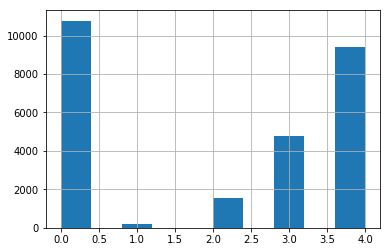

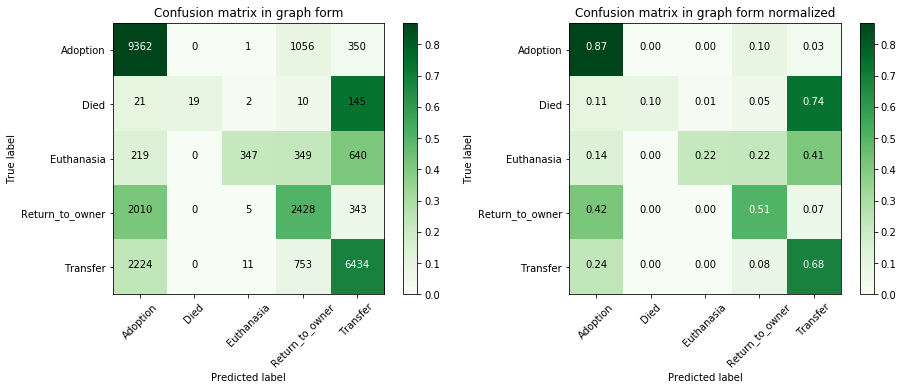

In [59]:
import itertools
import matplotlib.pyplot as plt 
print(target_label.classes_)
pd.Series(y_train_label).hist()

# Fait selon https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

cm = confusion_matrix(y_train_label, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

f = plt.figure(figsize=(15, 5))
f.add_subplot(1,2, 1)
plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion matrix in graph form")
plt.colorbar()
tick_marks = np.arange(len(target_label.classes_))
plt.xticks(tick_marks, target_label.classes_, rotation=45)
plt.yticks(tick_marks, target_label.classes_)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')


f.add_subplot(1,2, 2)
plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion matrix in graph form normalized")
plt.colorbar()
tick_marks = np.arange(len(target_label.classes_))
plt.xticks(tick_marks, target_label.classes_, rotation=45)
plt.yticks(tick_marks, target_label.classes_)

fmt = '.2f'
thresh = cm_norm.max() / 2.
for i, j in itertools.product(range(cm_norm.shape[0]), range(cm_norm.shape[1])):
    plt.text(j, i, format(cm_norm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm_norm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show(block=True)


### Justification ###
On voit que le classificateur RandomForestClassifier avec les hyper-paramètres choisis se débrouille plutôt bien pour certaines classes. En effet, voici les observations pour chaque classe :
* Les animaux adoptés sont bien prédits 87% du temps. Il arrive parfois que le modèle se trompe et fasse une prédiction comme quoi l'animal est retourné chez son propriétaire (10%) ou transféré (3%).
* Les animaux qui sont décédés sont mal prédits. En effet, le modèle prédit plutôt un transfert la majorité du temps (74%). Toutefois, comme le dataset contient peu d'exemplaires de cette classe (voir histogramme), il peut être difficile pour le modèle de bien la prédire. On remarque en revanche qu'il est très pessimiste (prudent), et qu'il n'a jamais prédit qu'un animal était décédé alors qu'il ne l'était pas.
* Les animaux euthanasiés subissent environ le même sort que ceux qui sont décédés, mais le modèle est plus incertain quant à leur classe; il attribue de 14% (adoption) à 41% (transfert) de prédictions aux autres classes, contre 22% pour la bonne classe.
* Le retour au propriétaire est bien prédit une faible majorité du temps (51%). Sinon, le modèle prédit une adoption (42%) ou un transfert (7%). On peut déduire que la différence entre l'adoption et le retour au propriétaire n'est pas très nette, surtout si l'on compare aux résultats pour les animaux ayant été adoptés (ligne 1), où les classes mal prédites sont presque toujours classées comme un retour au propriétaire.
* Le transfert est bien prédit la majorité du temps (68%). Le modèle se confond encore ici avec une adoption (24%) ou un retour au propriétaire (8%).

On remarque que les classes ayant une présence accrue (adoption et transfert, surtout) sont relativement bien prédites, alors que celles se retrouvant en moins grand nombre dans le dataset sont plus vagues (retour au propriétaire, euthanasie), ou carrément mal prédites (décès). Celles qui sont mal prédites le sont de façon pessimiste (le modèle n'attribue presque jamais une prédiction à ces classes lorsqu'il est en présence d'une autre), ce qui pourrait indiquer qu'il a du mal à corréler des facteurs qui causent explicitement des animaux à être classés de telle façon. Il faut se rappeler que les arbres de décision (dont est composée la RandomForest) ont besoin de features qui ont un apport clair sur la décision finale pour être efficaces (ils tentent de réduire l'entropie apportée par chaque feature), ce qui n'est peut-être pas le cas de notre dataset transformé.


## Bonus 3: Optimisation des hyper-paramètres (1 point)

Les hyper-paramètres sont les paramètres fixés avant la phase d'apprentissage. Pour optimiser les performances du modèle, on peut sélectionner les meilleurs hyper-paramètres.

A l'aide de sklearn, optimisez les hyper-paramètres du modèle que vous avez sélectionné et montrez que les performances ont été améliorées.
Vous pouvez utiliser par exemple: **GridSearchCV**


In [18]:
from SoftmaxClassifier import SoftmaxClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import numpy as np

parameters = {'n_estimators': [100, 200], 'max_features':['auto', 'sqrt'], 'criterion': ['gini', 'entropy'], 'max_depth': [8, 9, 10, 11, 12]}
rfc = RandomForestClassifier(random_state=69)
rfc_cv = GridSearchCV(RandomForestClassifier(random_state=69), parameters, cv=3, scoring='neg_log_loss')

rfc_cv.fit(X_train, y_train)
rfc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'n_estimators': 200}

## Question 18: Soumission (0.5 point)

Enfin, effectuez la prédiction sur l'ensemble de test et joignez vos résultats au rendu du TP.

**Optionnel**: Vous pouvez soumettre vos résultats sur kaggle et noter votre performance en terme de log loss.

In [ ]:
# best_model = 
# pred_test = pd.Series(best_model.transform(X_test))
# pred_test.to_csv("test_prediction.csv",index = False)